# Adam !!! (working on this)


## what is an optimizer?

- neural network training is an optimization problem where you wanna minimize the loss function.

- the goal is to shrink the gap between predicted and actual values by finding optimal parameter values through iterative updates.
- gradient descent is the go-to method for this optimization, but it's got some quirks.
- classic gradient descent, stochastic gradient descent (sgd), mini-batch gd, and other optimizers like momentum, adagrad, and rmsprop all have their own issues.
- that's why adam is often the default choice - it deals with many of these problems.

## problems with gradient descent and its variants

- the core of gradient descent is the update rule:
  ```
  θ = θ - α * ∇J(θ)
  where:
  θ: parameter (weight or bias)
  α: learning rate
  ∇J(θ): gradient of the cost function

- the learning rate α is crucial - it's like the step size in our optimization journey.

- pick α too big, and you might overshoot the minimum, maybe even failing to converge.
- pick α too small, and you're in for a long, slow crawl to the minimum.

- learning rate schedulers try to fix this by changing α during training, but they need preset values and don't adapt to the data.

- batch gradient descent might get stuck in local minima, missing the global minimum altogether.
- sgd's random nature gives it a shot at escaping local minima, but it's not guaranteed.

- another headache: all parameters get the same learning rate, which isn't ideal.

- saddle points - spots where the gradient is zero in all directions, bringing updates to a standstill.

> **Exponentially Weighted Moving Average or Exponential Weighted Average(EWMA)**


- it's a way to calculate the average of a set of values, giving more weight to recent data points.

- unlike a simple moving average where all data points in the window are weighted equally, ewma assigns exponentially decreasing weights to older observations.

- formula:
  ```
  v(t) = β * v(t-1) + (1-β) * θ(t)
  where:
  
  v(t) is the weighted average at time t
  β is the weight decay (usually close to 1, e.g., 0.9)
  θ(t) is the current observation
  
- more responsive to recent changes compared to simple moving averages.

- smooths out short-term fluctuations.
- β controls the rate at which the influence of older data points decays.
- used in optimization algorithms like momentum, rmsprop, and adam.
- helps in dealing with noisy gradients during training.
- can be used to estimate the first and second moments of gradients.
- requires less memory (only need to store the previous average).
- adapts more quickly to changes in the underlying data.

### Code of EWMA


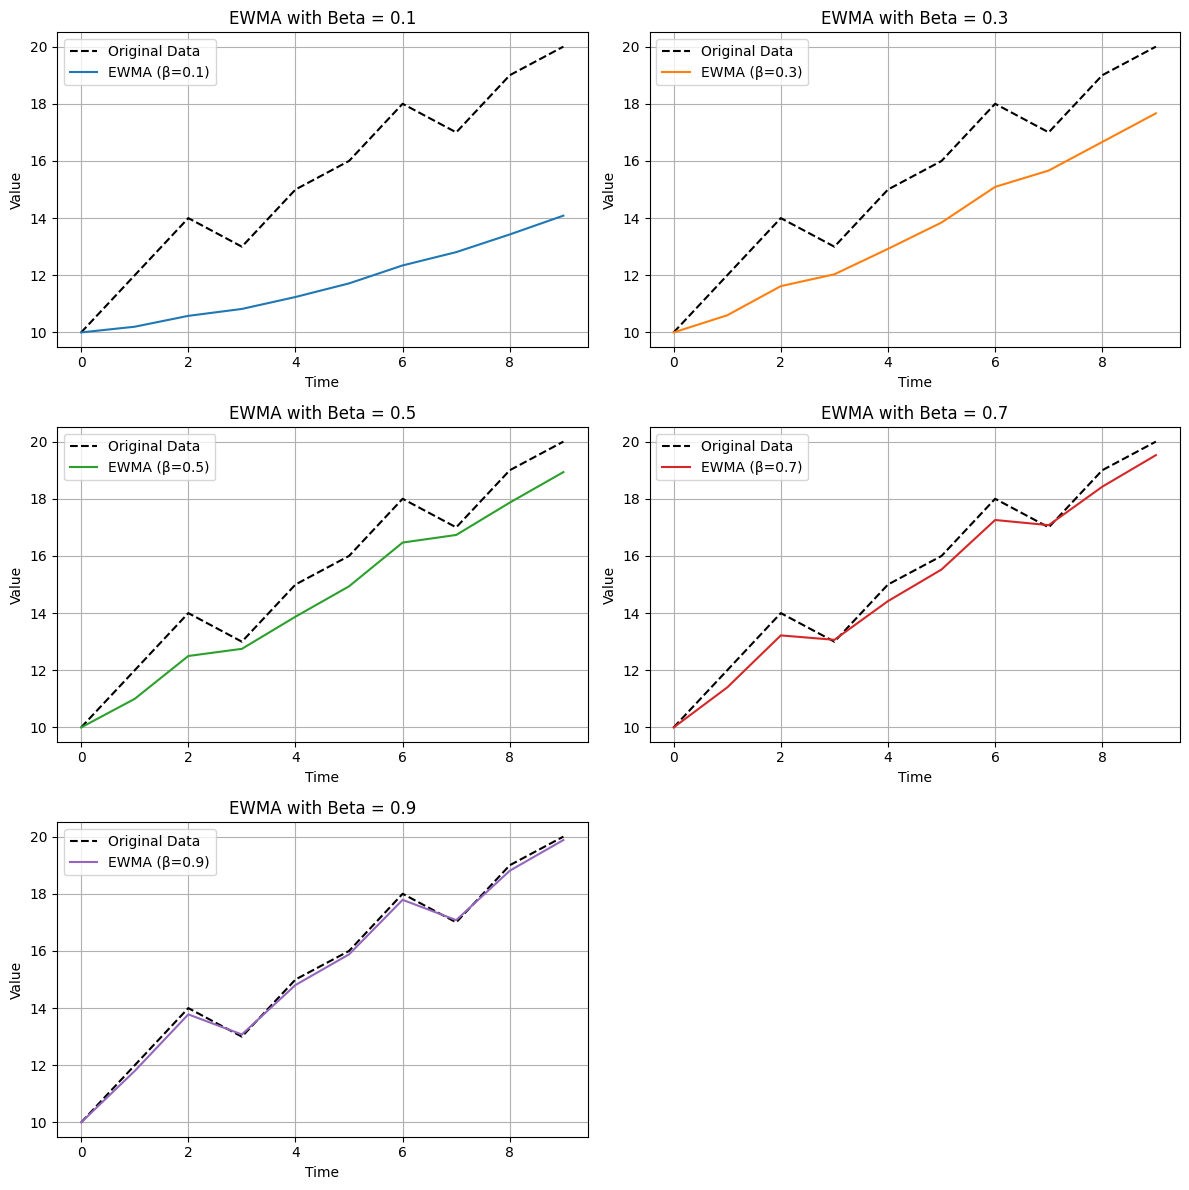

In [5]:
import numpy as np
import matplotlib.pyplot as plt


time_series_data = np.array([10, 12, 14, 13, 15, 16, 18, 17, 19, 20])


def calculate_ewma(data, beta):
    ewma = np.zeros(len(data))
    ewma[0] = data[0] 
    for t in range(1, len(data)):
        ewma[t] = beta * data[t] + (1 - beta) * ewma[t - 1]
    return ewma

def plot_ewma_subplots(data, betas):
    num_betas = len(betas)
    num_cols = 2 
    num_rows = (num_betas + num_cols - 1) // num_cols 
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4 * num_rows))
    axes = axes.flatten()  
    
    color_schemes = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
    
    for i, beta in enumerate(betas):
        ewma = calculate_ewma(data, beta)
        axes[i].plot(data, label='Original Data', color='black', linestyle='--')
        axes[i].plot(ewma, label=f'EWMA (β={beta})', color=color_schemes[i % len(color_schemes)])
        axes[i].set_title(f'EWMA with Beta = {beta}')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Value')
        axes[i].legend()
        axes[i].grid(True)
    
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


betas = [0.1, 0.3, 0.5, 0.7, 0.9]

plot_ewma_subplots(time_series_data, betas)


## advanced optimizers that tackle these issues

1. momentum 
2. adagrad
3. nag (nesterov accelerated gradient)
4. rmsprop
5. adam

> **momentum** 

> **adagrad**


> **nag (nesterov accelerated gradient)**


> **rmsprop**



> **adam**

